### Uber data analysis

In [1]:
##importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## importing dataset
uber_data = pd.read_csv('Uber Request Data.csv')
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
## data summary
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [4]:
## data exploring
uber_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [5]:
#Converting Request_timestamp and drop_timestamp to uniform datetime format

uber_data["Request timestamp"] = uber_data["Request timestamp"].apply(lambda x: pd.to_datetime(x))

uber_data["Drop timestamp"] = uber_data["Drop timestamp"].apply(lambda x: pd.to_datetime(x))

In [6]:
# Check for the null values 
uber_data.isna().apply(pd.value_counts)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
False,6745.0,6745.0,4095,6745.0,6745.0,2831
True,NaN,NaN,2650,NaN,NaN,3914


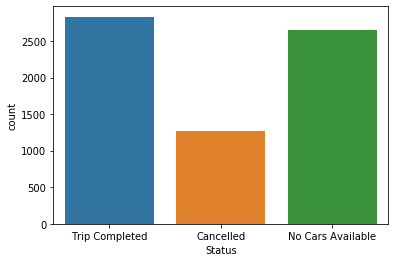

In [13]:
# data visualization 
sns.countplot(uber_data['Status'])

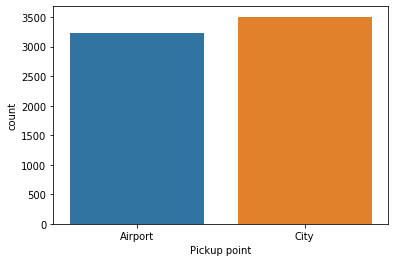

In [14]:
# data visualization
sns.countplot(uber_data['Pickup point'])

In [17]:
#Extract the hour from requested timestamp
uber_data["Request hour"] = uber_data["Request timestamp"].dt.hour
uber_data.head(5)


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


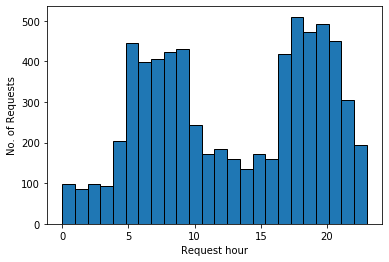

In [18]:
# data visualization
plt.hist(uber_data["Request hour"],edgecolor='black',bins=24)
plt.xlabel("Request hour")
plt.ylabel("No. of Requests")
plt.show()

In [20]:
#Divide the time of the day into five categories
def time_period(x):
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late Night"

In [19]:
uber_data['Time slot'] = uber_data['Request hour'].apply(lambda x: time_period(x))
uber_data.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


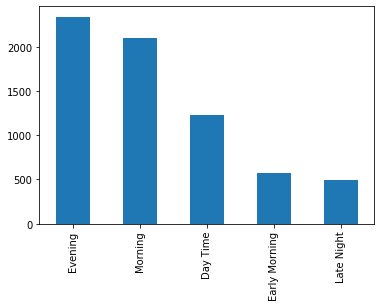

In [23]:
# data visualization
uber_data['Time slot'].value_counts().plot.bar()
plt.show()

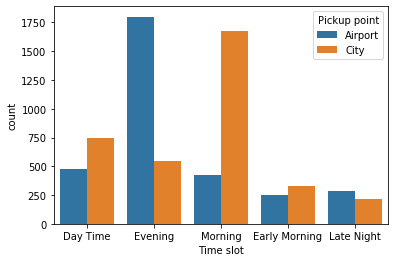

In [31]:
# data visualization
sns.countplot(x='Time slot',hue='Pickup point',data=uber_data)

#### insight :
the main active timeslots are the evening and th morning , where in the evening main requests comes from airport , while in the morning main requests are from the city.

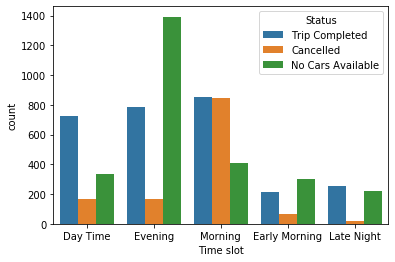

In [32]:
# data visualization
sns.countplot(x='Time slot',hue='Status',data=uber_data)

#### insights:
cars are mainly unavailable in the evening which is mainly is the time slot where requests were mainly from airport, consequently this is a market share that should be considered.